In [1]:
# Calcula la exposición al cambio climático para grupos demográficos femeninos

# Importamos librerías
import numpy as np
import pandas as pd
import geopandas as gpd
import geoviews as gv

# Parámetros de mapas
gv.extension("matplotlib")
def hook(plot, element):
    cax = plot.handles["cax"]
    ax = plot.handles["axis"]
    bbox = ax.get_position()
    l, b, w, h = bbox.x0, bbox.y0, bbox.width, bbox.height
    cax.set_position([l, 0.9*b, w, 0.05*h])
options = { "colorbar": True, "linewidth": 0.4,
    "hooks": [hook], "ylim":(-62,85), "xlim":(-180,180),
    "colorbar_opts": {"orientation": "horizontal"} }
options_m = { "bgcolor": "lightgray", "fontscale": 2, "aspect": 2.25 }

# Parámetros de visualización de tablas
pd.options.display.float_format = '{:,.1f}'.format

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [2]:
# Códigos nacionales
ix  = "ISO_A3"

# Mapa
borders_path = ( "../../Bases_de_datos/Mapas/"
    + "Natural_Earth/ne_50m_admin_0_countries_mod" )
borders = gpd.read_file(borders_path).drop(
    columns = [ix] ).set_index("ISO_A3_EH")
borders.index.name = ix
borders = borders[ borders["ISO_N3_EH"] != "-99" ]
borders = borders[ ~borders.index.duplicated() ]

# Océano
ocean_path = ( "../../Bases_de_datos/Mapas/"
    + "Natural_Earth/ne_50m_ocean" )
ocean = gv.Polygons( gpd.read_file(ocean_path), vdims = "min_zoom"
    ).opts( linewidth = 0, cmap = "Paired")

In [3]:
# Funciones a utilizar

# Mejora el formato de las tablas para su uso en documentos.
def display(df, vn, var_i = None, p = False, format = ["{:.1f}"],
    category = "", type = "category", add = False):
    # variables
    # df:       dataframe que contiene los datos
    # vn:       variable principal
    # var_i:    conjunto de variables secundarias, solo si type = "index"
    # p:        indica si la variable es positiva
    # format:   formato a usar, se pasa como un solo datos si
    #           type = "category" y como una
    #           lista por cada columna si type = "index"
    # category: nombre de la categoría, solo si type = "category"
    # type:     tipo de tabla a crear
    #           "index":    Resumen de variables
    #           "category": Una variable principal
    # add:      indica si sumar (True) o promediar (False) cada columna,
    #           se pasa como un solo datos si type = "category" y como una
    #           lista por cada columna si type = "index"
    #
    # regresa
    # disp:     Objeto Display de Pandas o un Dataframe
    #           de pandas basado en la tabla de entrada

    # Escogemos los 5 países más altos y otros más para formar la tabla
    # Resumen de variables
    if   type == "index":
        disp = df.loc[ df[vn].notnull(),
            ["name", vn] + var_i ].sort_values(
            vn, ascending = p ).reset_index(drop = True).head(15).copy()
    # Una variable principal
    elif type == "category":
        disp = df.loc[ df[vn].notnull(), ["name", vn] ].sort_values(
            vn, ascending = p ).reset_index(drop = True).head(15).copy()
    c_list = list( disp[ ["name", vn]
        ].sort_values(vn, ascending = p).head(5)["name"].values )
    print(f"Most vulnerable countries: {', '.join(c_list)}")

    # Renombramos columnas
    # Resumen de variables
    if   type == "index":
        cols = ["Name", vn] + var_i
    # Una variable principal
    elif type == "category":
        cols = [ "Name", f"{category}" ]
    disp.columns = cols

    # Categorías geopolíticas y geográficas
    cats = [ "", "", "", "", "", "", "SIDS", "LDC", "LLDC",
        "Asia", "Europe", "Africa", "Oceania", "Americas" ]
    # Iteramos para cada categoría geopolítica
    for r, cat in enumerate(cats[:9]):
        if r in range(0, 6): pass
        else:
            disp.iloc[r, 0] = cat
            # Resumen de variables
            if   type == "index":
                # Sumamos o promediamos según sea el caso
                for i, c in enumerate(cols[1:]):
                    if add[i]: disp.iloc[r, i+1] = df.loc[ df[cat], c ].sum()
                    else:      disp.iloc[r, i+1] = df.loc[ df[cat], c ].mean()
            # Una variable principal
            elif type == "category":
                # Sumamos la columna
                if add: disp.iloc[r, 1] = df.loc[df[cat], vn].sum()
                # Promediamos la columna
                else  : disp.iloc[r, 1] = df.loc[df[cat], vn].mean()
            c_list = list( df.loc[df[cat], ["name", vn]
                ].sort_values( vn, ascending = p
                ).head(5)["name"].values )
            print(f"Most vulnerable {cat}: {', '.join(c_list)}")

    # Iteramos para cada categoría geográfica
    for r, cat in enumerate(cats):
        if r in range(0, 9): pass
        else:
            disp.iloc[r, 0] = cat
            # Resumen de variables
            if   type == "index":
                # Sumamos o promediamos según sea el caso
                for i, c in enumerate(cols[1:]):
                    if add[i]:
                        disp.iloc[r, i+1] = df.loc[
                            df["region"] == cat, c ].sum()
                    else     :
                        disp.iloc[r, i+1] = df.loc[
                            df["region"] == cat, c ].mean()
            # Una variable principal
            elif type == "category":
                # Sumamos la columna
                if add:
                    disp.iloc[r, 1] = df.loc[df["region"] == cat, vn].sum()
                # Promediamos la columna
                else  :
                    disp.iloc[r, 1] = df.loc[df["region"] == cat, vn].mean()

    # Total mundial
    cat = "World"
    r = 14
    disp.iloc[r, 0] = cat
    # Resumen de variables
    if   type == "index":
        # Sumamos o promediamos según sea el caso
        for i, c in enumerate(cols[1:]):
            if add[i]: disp.iloc[r, i+1] = df[c].sum()
            else     : disp.iloc[r, i+1] = df[c].mean()
    # Una variable principal
    elif type == "category":
        # Sumamos la columna
        if add: disp.iloc[r, 1] = df[vn].sum()
        # Promediamos la columna
        else  : disp.iloc[r, 1] = df[vn].mean()

    # Damos formato
    # Resumen de variables
    if   type == "index":
        # Pasamos la tabla sin formato
        disp = disp.style.format( dict(zip(cols[1:], format)) )
        # Una variable principal
    elif type == "category":
        disp = disp.style.format( { cols[1]: format } )

    # Regresamos la tabla
    return disp

In [4]:
# Códigos nacionales
ix  = "ISO_A3"

s_f = ["1995_2014", "2040_2059_SSP245"]
g_f = ["f", "m"]
g_n = ["Female", "Male"]
a_f = [0, 1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
a_n = ( ["0-12 months"] + [f"{x} years" for x in [ "1-5",  "5-10", "10-15",
  "15-20", "20-25", "25-30", "30-35", "35-40", "40-45", "45-50", "50-55",
  "55-60", "60-65", "65-70", "70-75", "75-80", "more than 80" ] ] )
var_tot  = "Extreme climate"
names     = "age_sex_structures"

s = 1

file_n  = f"{names}_{s_f[s]}.csv"
df_iso = pd.read_csv( f"../share/Indexes/{file_n}", index_col = ix )

df = df_iso[["name", "ISO_N3", "region", "sub-region", "OECD", "EU27",
        "BRICS+", "BRICS", "LDC", "SIDS", "LLDC"]].copy()

var_g  = [[], []]
name_g = [[], []]
perc_g = [[], []]
for g in range(len(g_f)):

    var_n   = [ f"{g_n[g]} population, {x} old" for x in a_n ]
    name_n  = [ f" affected {x.lower()}" for x in var_n ]
    name_t  = [ f"{var_tot}{x}" for x in name_n ]
    name_tp = [ f"% {x}" for x in name_t ]

    var_0  = var_n[0]
    name_0 = name_t[0]
    perc_0 = name_tp[0]
    var_g[ g].append(var_0 )
    name_g[g].append(name_0)
    perc_g[g].append(perc_0)

    var_5  =   f"{g_n[g]} population, 0-5 years old"
    name_5 = ( f"Extreme climate affected {g_n[g].lower()} "
        + "population, 0-5 years old" )
    perc_5 =   f"% {name_5}"
    var_g[ g].append(var_5 )
    name_g[g].append(name_5)
    perc_g[g].append(perc_5)

    var_65  =   f"{g_n[g]} population, more than 65 years old"
    name_65 = ( f"Extreme climate affected {g_n[g].lower()} "
        + "population, more than 65 years old" )
    perc_65 =   f"% {name_65}"
    var_g[ g].append(var_65 )
    name_g[g].append(name_65)
    perc_g[g].append(perc_65)

    var_total  =   f"{g_n[g]} population"
    name_total = ( f"Extreme climate affected {g_n[g].lower()} population" )
    perc_total =   f"% {name_total}"
    var_g[ g].append(var_total )
    name_g[g].append(name_total)
    perc_g[g].append(perc_total)

    df[var_0 ] = df_iso[ var_n[0:1] ].sum(axis = 1)
    df[name_0] = df_iso[ name_t[0:1] ].sum(axis = 1)
    df[perc_0] = 100 * df[name_0] / df[var_0]

    df[var_5 ] = df_iso[ var_n[0:2] ].sum(axis = 1)
    df[name_5] = df_iso[ name_t[0:2] ].sum(axis = 1)
    df[perc_5] = 100 * df[name_5] / df[var_5]

    df[var_65 ] = df_iso[ var_n[-4:] ].sum(axis = 1)
    df[name_65] = df_iso[ name_t[-4:] ].sum(axis = 1)
    df[perc_65] = 100 * df[name_65] / df[var_65]

    df[var_total ] = df_iso[ var_n ].sum(axis = 1)
    df[name_total] = df_iso[ name_t ].sum(axis = 1)
    df[perc_total] = 100 * df[name_total] / df[var_total]

diff_0     = ( "Extreme climate affected % difference "
    + "between female and male population, 0-12 months old" )
diff_5     = ( "Extreme climate affected % difference "
    + "between female and male population, 0-5 years old" )
diff_65    = ( "Extreme climate affected % difference "
    + "between female and male population, more than 65 years old" )
diff_total = ( "Extreme climate affected % difference "
    + "between female and male population" )
diff = [diff_0, diff_5, diff_65, diff_total]

df[diff_0 ] = df[ perc_g[0][0] ] - df[ perc_g[1][0] ]
df[diff_5 ] = df[ perc_g[0][1] ] - df[ perc_g[1][1] ]
df[diff_65] = df[ perc_g[0][2] ] - df[ perc_g[1][2] ]
df[diff_total] = df[ perc_g[0][2] ] - df[ perc_g[1][2] ]

# Parámetros de visualización de tablas
pd.options.display.float_format = '{:,.0f}'.format
df[ ["name"] + name_g[0] ].sort_values(
    name_g[0][-1], ascending = False ).head(10)

,name,"Extreme climate affected female population, 0-12 months old","Extreme climate affected female population, 0-5 years old","Extreme climate affected female population, more than 65 years old",Extreme climate affected female population
ISO_A3,,,,,
IND,India,"8,472,478","40,879,770","32,532,512","461,800,004"
CHN,China,"1,519,750","7,986,945","19,074,908","161,805,350"
PAK,Pakistan,"2,349,473","11,751,500","4,697,300","95,512,707"
JPN,Japan,"481,121","2,466,947","19,948,223","63,998,010"
NGA,Nigeria,"2,081,192","9,957,897","1,610,221","54,590,284"
EGY,Egypt,"902,168","5,125,475","2,258,135","43,033,963"
PHL,Philippines,"917,626","4,424,549","2,526,042","42,250,072"
MEX,Mexico,"513,798","2,609,478","2,180,909","29,671,418"
KOR,"Korea, Republic of","219,609","1,074,721","4,759,264","25,597,292"


Female population, 0-12 months old   67,315,632
Male population, 0-12 months old     71,764,769
Extreme climate affected female population, 0-12 months old   40.3 %
Extreme climate affected male population, 0-12 months old     40.8 %

min: 0.0, max: 8472478.066300001


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Extreme climate affected female population, 0-12 months old)
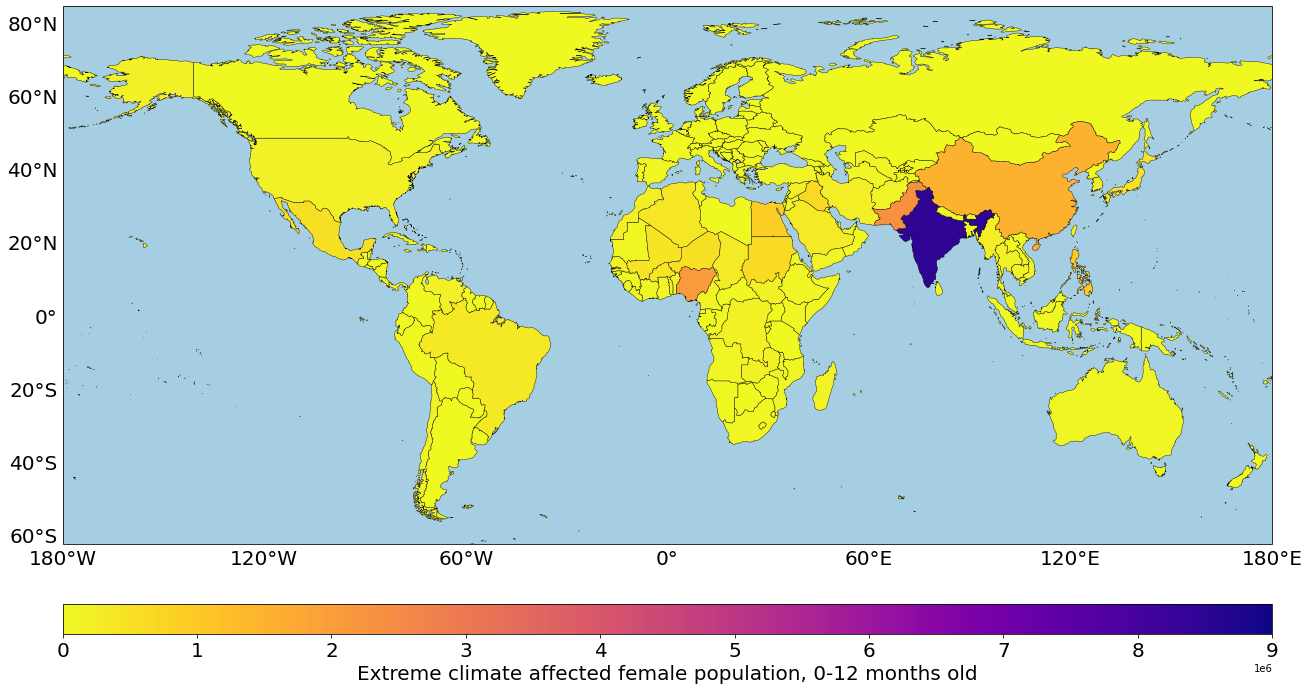

min: 0.0, max: 100.0


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (% Extreme climate affected female population, 0-12 months old)
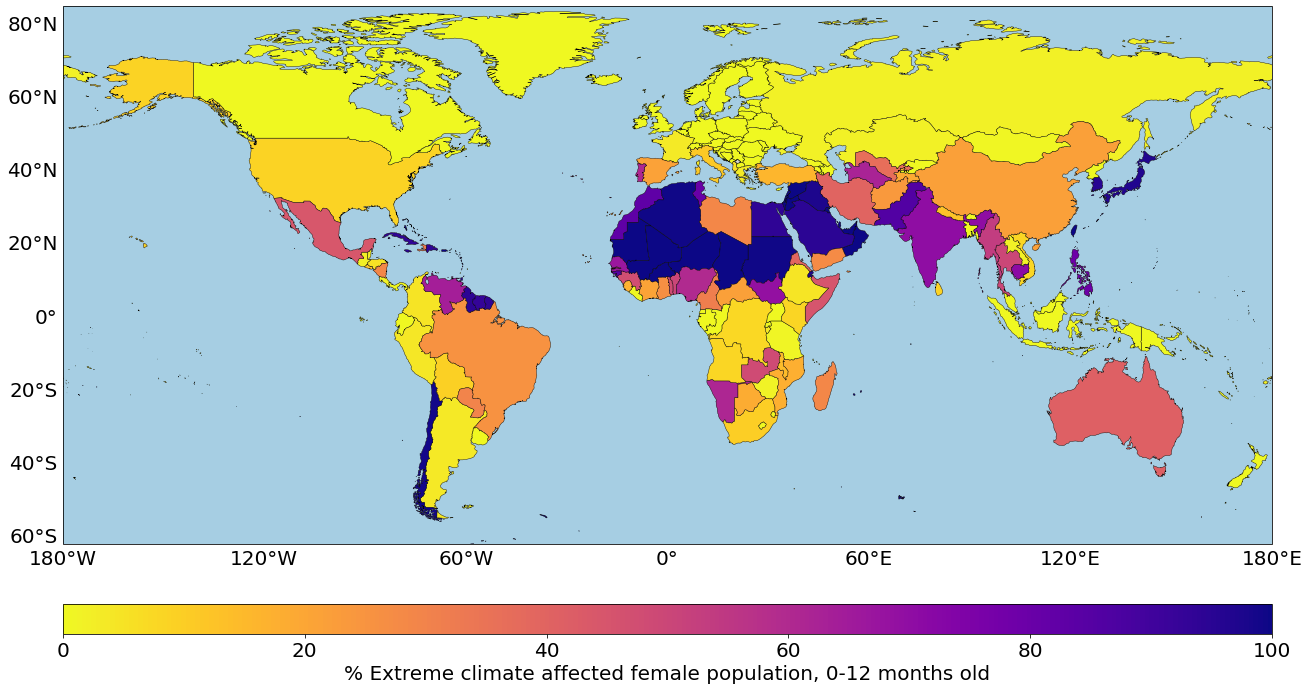

min: -1.4698851667415127, max: 1.438649534740577


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Extreme climate affected % difference between female and male population, 0-12 months old)
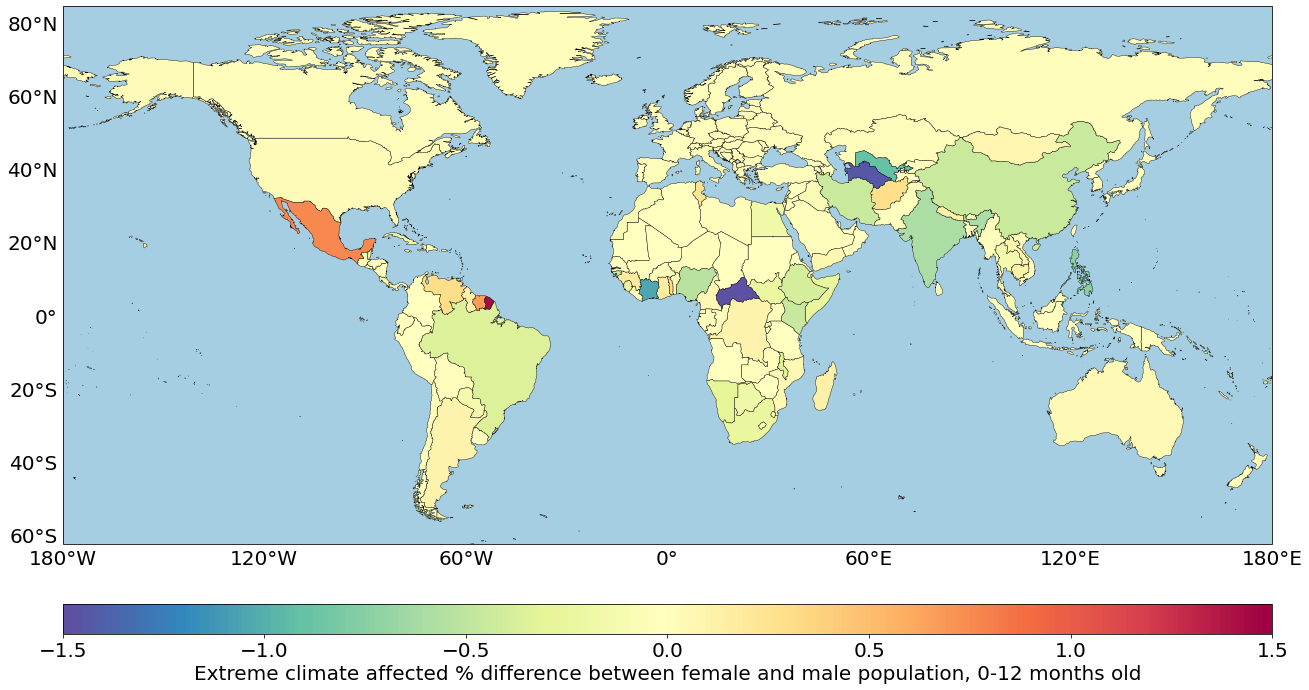

Most vulnerable countries: Bonaire, Sint Eustatius and Saba, French Guiana, Saint Vincent and the Grenadines, Mexico, Suriname
Most vulnerable SIDS: Saint Vincent and the Grenadines, Suriname, Trinidad and Tobago, Guyana, Haiti
Most vulnerable LDC: Afghanistan, Togo, Guinea, Cambodia, Nepal
Most vulnerable LLDC: Afghanistan, Nepal, Lao People's Democratic Republic, Mongolia, Kazakhstan


,Name,"Extreme climate affected % difference between female and male population, 0-12 months old","% Extreme climate affected female population, 0-12 months old","Extreme climate affected female population, 0-12 months old"
0,"Bonaire, Sint Eustatius and Saba",1.49,28.9,37
1,French Guiana,1.44,94.0,"3,952"
2,Saint Vincent and the Grenadines,1.22,88.7,598
3,Mexico,0.76,44.4,"513,798"
4,Suriname,0.66,92.7,"4,858"
5,Venezuela (Bolivarian Republic of),0.32,63.7,"182,497"
6,SIDS,-0.05,50.8,"300,041"
7,LDC,-0.07,35.3,"4,421,682"
8,LLDC,-0.14,24.3,"2,512,806"
9,Asia,-0.08,46.5,"17,090,063"


In [5]:
i = 0
a = df[ [var_g[0][i], var_g[1][i]] ].sum()
b = ( 100 * df[ [name_g[0][i], name_g[1][i]] ].sum()
    / df[ [var_g[0][i], var_g[1][i]] ].sum().values )
# Parámetros de visualización de tablas
pd.options.display.float_format = '{:,.0f}'.format
print(a.to_string())
# Parámetros de visualización de tablas
pd.options.display.float_format = '{:,.1f} %'.format
print(b.to_string())
print()

# Mapas
# Mujeres afectadas
vn = name_g[0][i]
borders[vn] = df[vn]
print(f"min: {borders[vn].min()}, max: {borders[vn].max()}")
min = 0
max = 9e6
map_v = gv.Polygons( borders, vdims = gv.Dimension(vn, range = (min, max) )
    ).opts( cmap = "plasma_r", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )
# Porcentaje de mujeres afectadas
vn = perc_g[0][i]
borders[vn] = df[vn].where( df[vn] < 100, 100)
print(f"min: {borders[vn].min()}, max: {borders[vn].max()}")
min = 0
max = 100
map_v = gv.Polygons( borders, vdims = gv.Dimension(vn, range = (min, max) )
    ).opts( cmap = "plasma_r", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )
# Diferencia de porcentaje entre mujeres y hombre
vn = diff[i]
borders[vn] = df[vn]
# Quitamos Cabo Verde por motivos de visualización
borders.loc["CPV", vn] = np.nan
print(f"min: {borders[vn].min()}, max: {borders[vn].max()}")
#print(borders[vn].sort_values().dropna().to_string())
min = -1.5
max = 1.5
map_v = gv.Polygons( borders, vdims = gv.Dimension(vn, range = (min, max) )
    ).opts( cmap = "spectral_r", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

# Resumen por países
disp = display(df, diff[i], var_i = [ perc_g[0][i], name_g[0][i] ],
    p = False, type = "index", add = [False, False, True],
    format = ["{:,.2f}", "{:,.1f}", "{:,.0f}"])
disp

In [6]:
disp = display(df, perc_g[0][i], var_i = [ name_g[0][i] ], p = False,
    type = "index", add = [False, True], format = ["{:,.1f}", "{:,.0f}"])
disp

Most vulnerable countries: Bahrain, Israel, Niger, Qatar, Virgin Islands (British)
Most vulnerable SIDS: Virgin Islands (British), Martinique, Dominica, Sint Maarten (Dutch part), Turks and Caicos Islands
Most vulnerable LDC: Niger, Chad, Mali, Mauritania, Burkina Faso
Most vulnerable LLDC: Niger, Chad, Mali, Burkina Faso, South Sudan


,Name,"% Extreme climate affected female population, 0-12 months old","Extreme climate affected female population, 0-12 months old"
0,Bahrain,100.0,"14,451"
1,Israel,100.0,"75,300"
2,Niger,100.0,"521,189"
3,Qatar,100.0,"31,107"
4,Virgin Islands (British),100.0,182
5,Martinique,100.0,"2,702"
6,SIDS,50.8,"300,041"
7,LDC,35.3,"4,421,682"
8,LLDC,24.3,"2,512,806"
9,Asia,46.5,"17,090,063"


In [7]:
disp = display(df, name_g[0][i], var_i = [ perc_g[0][i] ], p = False,
    type = "index", add = [True, False ], format = ["{:,.0f}", "{:,.1f}"])
disp

Most vulnerable countries: India, Pakistan, Nigeria, China, Philippines
Most vulnerable SIDS: Dominican Republic, Cuba, Haiti, Guinea-Bissau, Jamaica
Most vulnerable LDC: Sudan, Niger, Mali, Burkina Faso, Chad
Most vulnerable LLDC: Niger, Mali, Burkina Faso, Chad, South Sudan


,Name,"Extreme climate affected female population, 0-12 months old","% Extreme climate affected female population, 0-12 months old"
0,India,"8,472,478",70.0
1,Pakistan,"2,349,473",85.8
2,Nigeria,"2,081,192",59.9
3,China,"1,519,750",21.8
4,Philippines,"917,626",79.1
5,Egypt,"902,168",94.0
6,SIDS,"300,041",50.8
7,LDC,"4,421,682",35.3
8,LLDC,"2,512,806",24.3
9,Asia,"17,090,063",46.5


Female population, 0-5 years old   334,905,736
Male population, 0-5 years old     358,083,656
Extreme climate affected female population, 0-5 years old   40.1 %
Extreme climate affected male population, 0-5 years old     40.6 %

min: 0.0, max: 40879770.066300005


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Extreme climate affected female population, 0-5 years old)
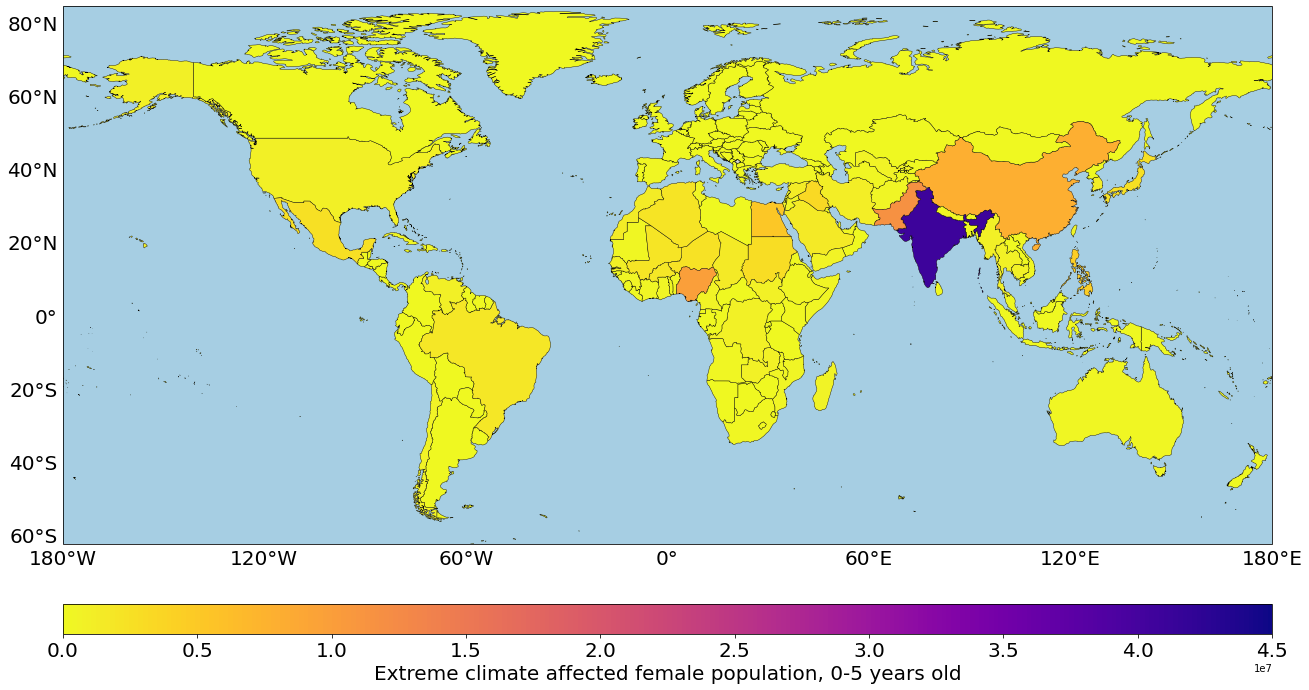

min: 0.0, max: 100.0


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (% Extreme climate affected female population, 0-5 years old)
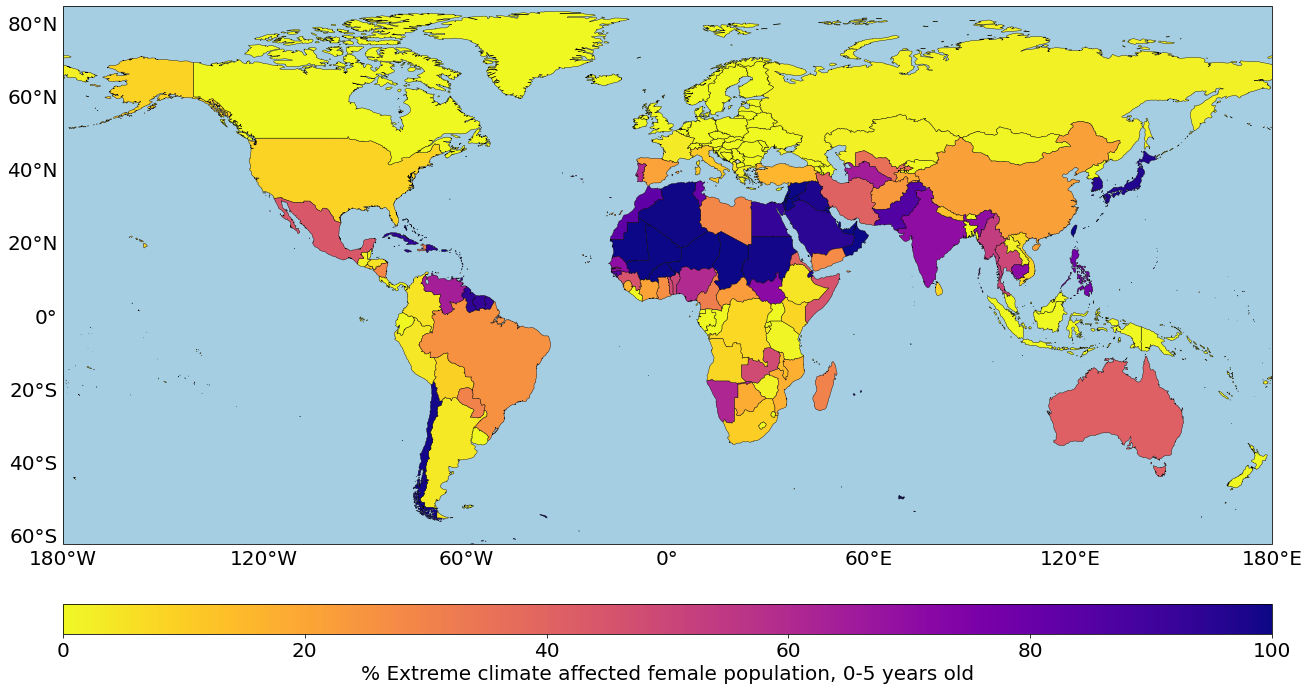

min: -1.5785223859754076, max: 1.2163444816657005


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Extreme climate affected % difference between female and male population, 0-5 years old)
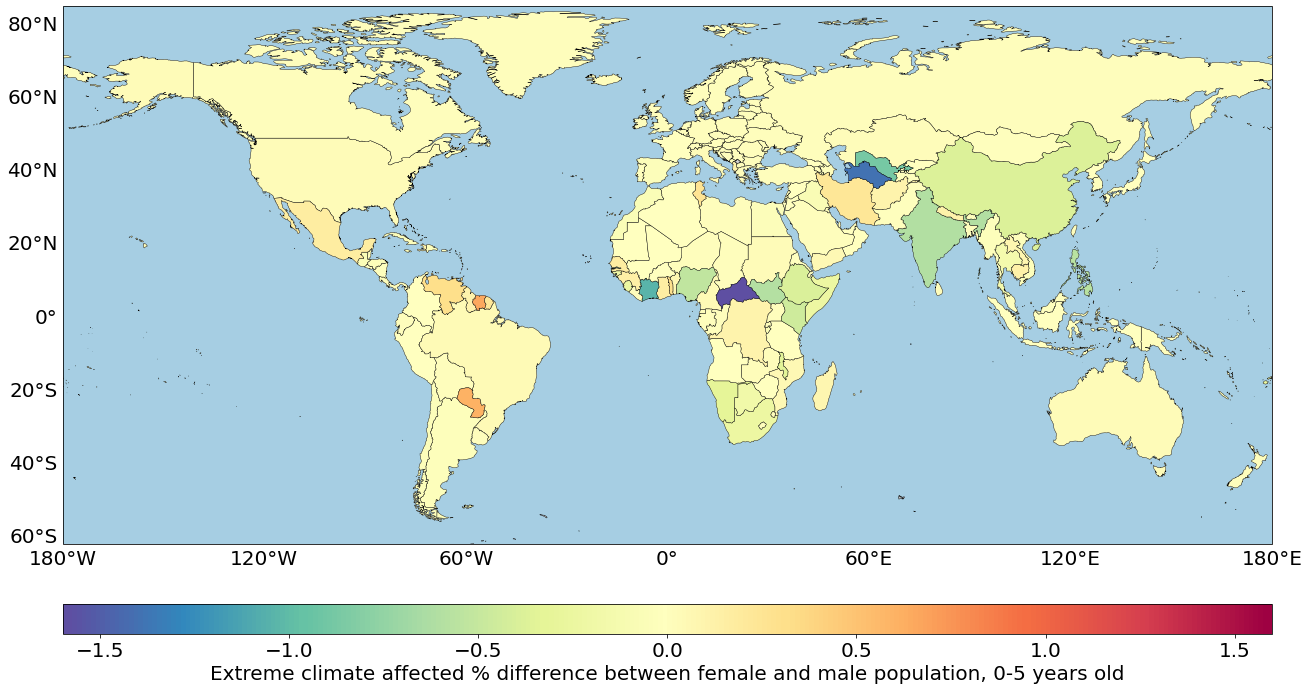

Most vulnerable countries: Bonaire, Sint Eustatius and Saba, Saint Vincent and the Grenadines, Suriname, Paraguay, Venezuela (Bolivarian Republic of)
Most vulnerable SIDS: Saint Vincent and the Grenadines, Suriname, Trinidad and Tobago, Guyana, Haiti
Most vulnerable LDC: Togo, Senegal, Guinea, Cambodia, Nepal
Most vulnerable LLDC: Paraguay, Nepal, Afghanistan, Lao People's Democratic Republic, Kazakhstan


,Name,"Extreme climate affected % difference between female and male population, 0-5 years old","% Extreme climate affected female population, 0-5 years old","Extreme climate affected female population, 0-5 years old"
0,"Bonaire, Sint Eustatius and Saba",1.49,28.9,224
1,Saint Vincent and the Grenadines,1.22,88.7,"2,972"
2,Suriname,0.65,92.7,"24,685"
3,Paraguay,0.60,30.4,"108,951"
4,Venezuela (Bolivarian Republic of),0.32,63.7,"919,350"
5,Togo,0.29,48.2,"300,400"
6,SIDS,-0.04,50.8,"1,501,236"
7,LDC,-0.07,35.4,"21,076,700"
8,LLDC,-0.14,24.5,"11,948,281"
9,Asia,-0.07,46.6,"84,487,442"


In [8]:
i = 1
a = df[ [var_g[0][i], var_g[1][i]] ].sum()
b = ( 100 * df[ [name_g[0][i], name_g[1][i]] ].sum()
    / df[ [var_g[0][i], var_g[1][i]] ].sum().values )
# Parámetros de visualización de tablas
pd.options.display.float_format = '{:,.0f}'.format
print(a.to_string())
# Parámetros de visualización de tablas
pd.options.display.float_format = '{:,.1f} %'.format
print(b.to_string())
print()

# Mapas
# Mujeres afectadas
n_series = "female"
vn = name_g[0][i]
borders[vn] = df[vn]
print(f"min: {borders[vn].min()}, max: {borders[vn].max()}")
min = 0
max = 4.5e7
map_v = gv.Polygons( borders, vdims = gv.Dimension(vn, range = (min, max) )
    ).opts( cmap = "plasma_r", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )
# Porcentaje de mujeres afectadas
n_series = "female"
vn = perc_g[0][i]
borders[vn] = df[vn].where( df[vn] < 100, 100)
print(f"min: {borders[vn].min()}, max: {borders[vn].max()}")
min = 0
max = 100
map_v = gv.Polygons( borders, vdims = gv.Dimension(vn, range = (min, max) )
    ).opts( cmap = "plasma_r", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )
# Diferencia de porcentaje entre mujeres y hombre
n_series = "female"
vn = diff[i]
borders[vn] = df[vn]
# Quitamos Cabo Verde por motivos de visualización
borders.loc["CPV", vn] = np.nan
print(f"min: {borders[vn].min()}, max: {borders[vn].max()}")
#print(borders[vn].sort_values().dropna().to_string())
min = -1.6
max = 1.6
map_v = gv.Polygons( borders, vdims = gv.Dimension(vn, range = (min, max) )
    ).opts( cmap = "spectral_r", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

disp = display(df, diff[i], var_i = [ perc_g[0][i], name_g[0][i] ],
    p = False, type = "index", add = [False, False, True],
    format = ["{:,.2f}", "{:,.1f}", "{:,.0f}"])
disp

In [9]:
disp = display(df, perc_g[0][i], var_i = [ name_g[0][i] ], p = False,
    type = "index", add = [False, True], format = ["{:,.1f}", "{:,.0f}"])
disp

Most vulnerable countries: Chad, Dominica, Bahrain, Niger, Israel
Most vulnerable SIDS: Dominica, Virgin Islands (British), Tonga, Martinique, Turks and Caicos Islands
Most vulnerable LDC: Chad, Niger, Mali, Mauritania, Burkina Faso
Most vulnerable LLDC: Chad, Niger, Mali, Burkina Faso, South Sudan


,Name,"% Extreme climate affected female population, 0-5 years old","Extreme climate affected female population, 0-5 years old"
0,Chad,100.0,"1,441,434"
1,Dominica,100.0,"3,475"
2,Bahrain,100.0,"72,344"
3,Niger,100.0,"2,396,684"
4,Israel,100.0,"398,374"
5,Virgin Islands (British),100.0,948
6,SIDS,50.8,"1,501,236"
7,LDC,35.4,"21,076,700"
8,LLDC,24.5,"11,948,281"
9,Asia,46.6,"84,487,442"


In [10]:
disp = display(df, name_g[0][i], var_i = [ perc_g[0][i] ], p = False,
    type = "index", add = [True, False ], format = ["{:,.0f}", "{:,.1f}"])
disp

Most vulnerable countries: India, Pakistan, Nigeria, China, Egypt
Most vulnerable SIDS: Dominican Republic, Cuba, Haiti, Guinea-Bissau, Jamaica
Most vulnerable LDC: Sudan, Niger, Mali, Burkina Faso, Chad
Most vulnerable LLDC: Niger, Mali, Burkina Faso, Chad, South Sudan


,Name,"Extreme climate affected female population, 0-5 years old","% Extreme climate affected female population, 0-5 years old"
0,India,"40,879,770",70.0
1,Pakistan,"11,751,500",85.8
2,Nigeria,"9,957,897",59.9
3,China,"7,986,945",21.5
4,Egypt,"5,125,475",93.3
5,Philippines,"4,424,549",77.4
6,SIDS,"1,501,236",50.8
7,LDC,"21,076,700",35.4
8,LLDC,"11,948,281",24.5
9,Asia,"84,487,442",46.6


Female population, more than 65 years old   403,067,422
Male population, more than 65 years old     331,641,062
Extreme climate affected female population, more than 65 years old   30.8 %
Extreme climate affected male population, more than 65 years old     32.3 %

min: 0.0, max: 32532511.5


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Extreme climate affected female population, more than 65 years old)
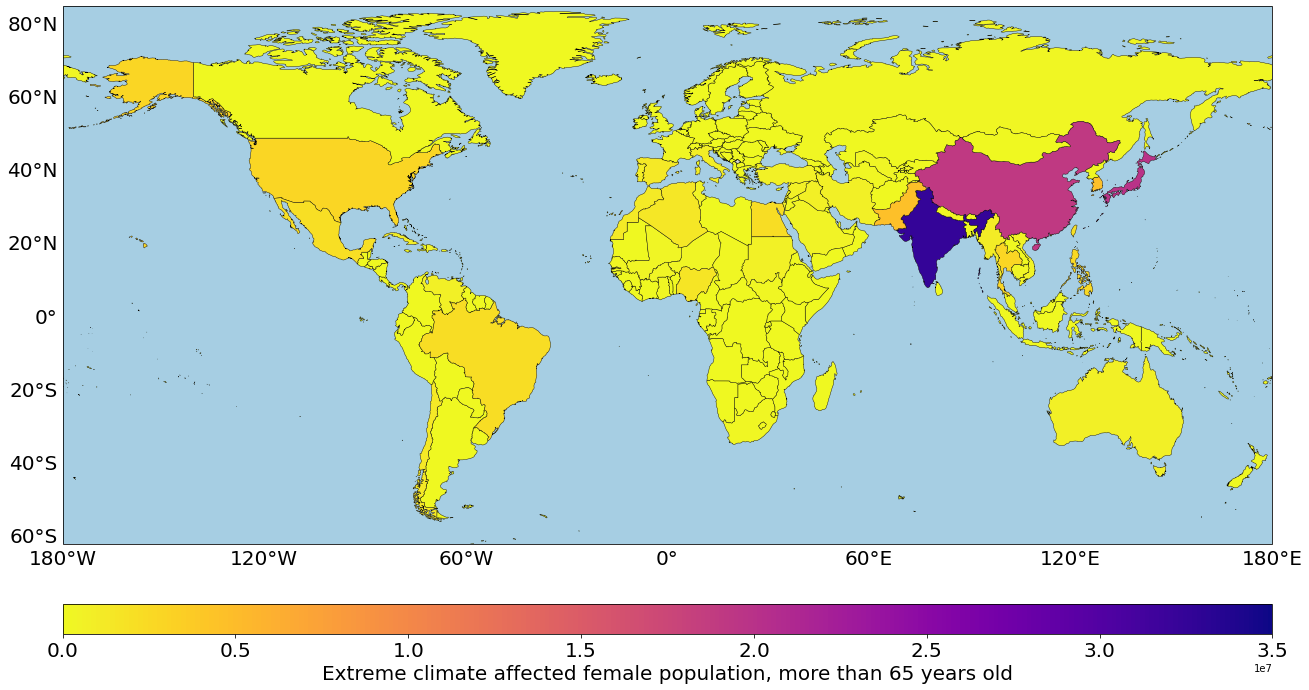

min: 0.0, max: 100.0


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (% Extreme climate affected female population, more than 65 years old)
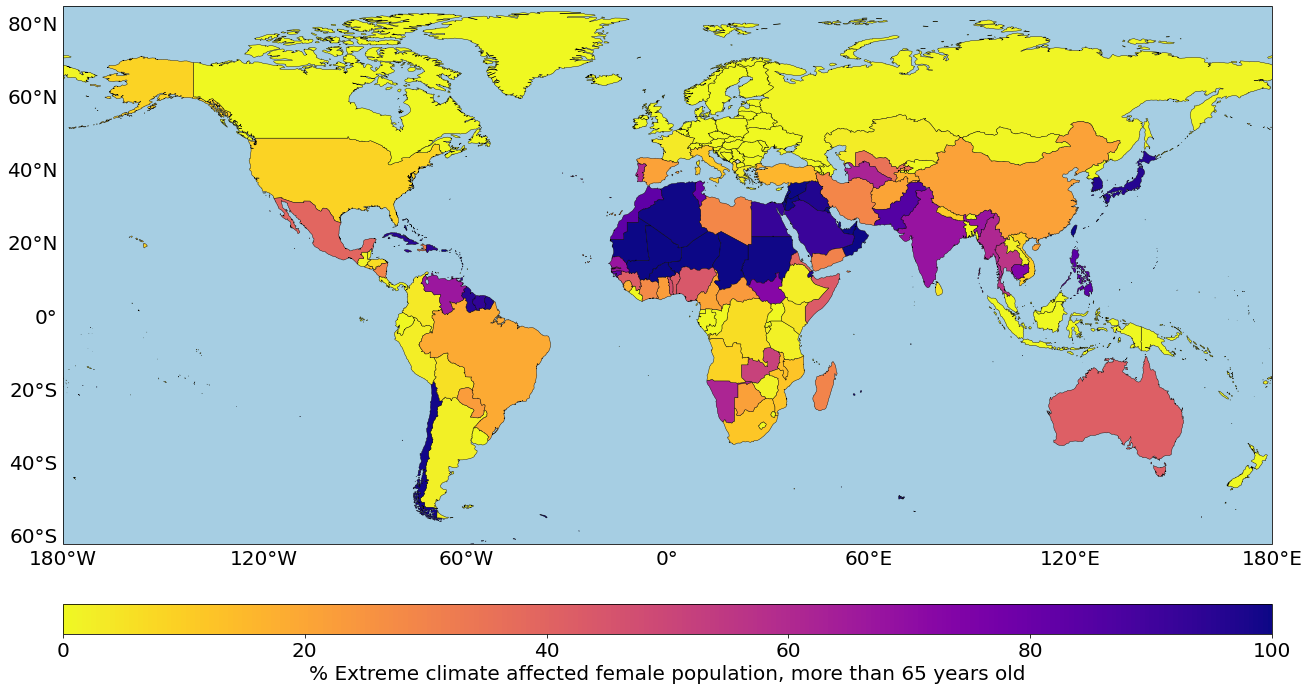

min: -7.888725941592583, max: 5.220216870628192


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Extreme climate affected % difference between female and male population, more than 65 years old)
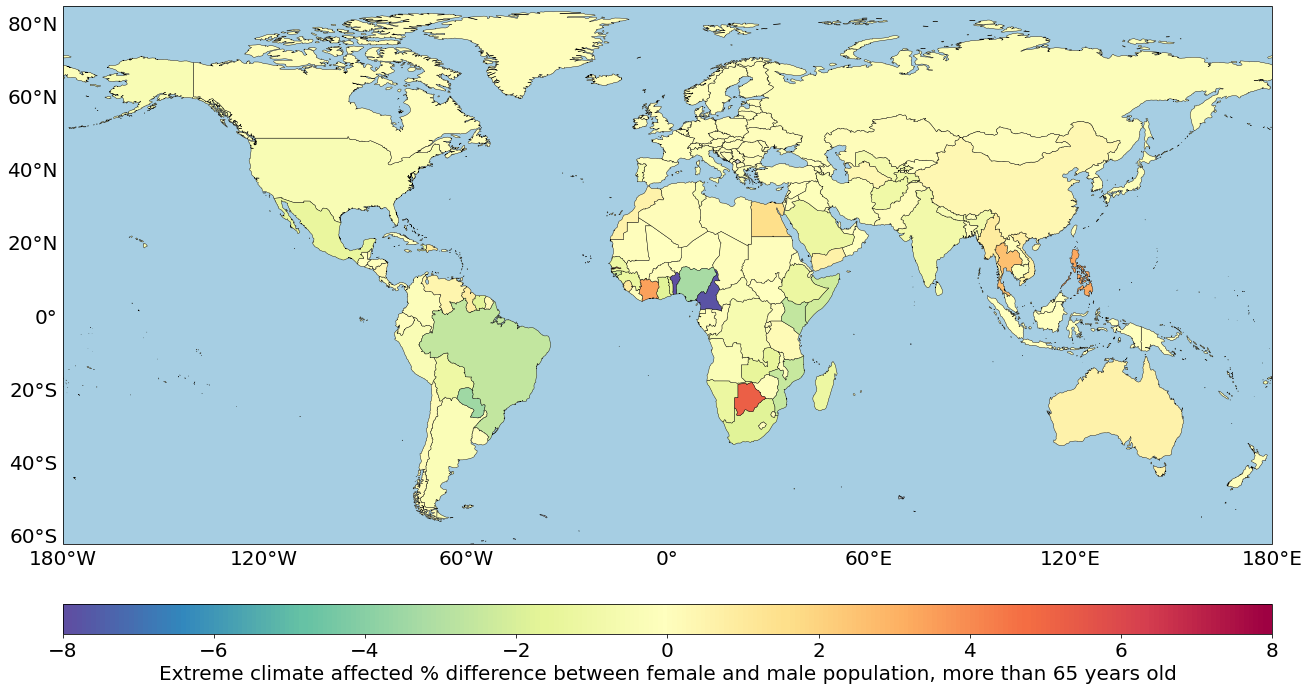

Most vulnerable countries: Botswana, Gambia, Côte d'Ivoire, Philippines, Thailand
Most vulnerable SIDS: Saint Vincent and the Grenadines, Dominican Republic, Guyana, Jamaica, Trinidad and Tobago
Most vulnerable LDC: Gambia, Sierra Leone, Myanmar, Yemen, Tanzania, United Republic of
Most vulnerable LLDC: Botswana, Turkmenistan, Kazakhstan, Lao People's Democratic Republic, Burkina Faso


,Name,"Extreme climate affected % difference between female and male population, more than 65 years old","% Extreme climate affected female population, more than 65 years old","Extreme climate affected female population, more than 65 years old"
0,Botswana,5.22,21.7,"13,624"
1,Gambia,4.68,48.5,"14,858"
2,Côte d'Ivoire,3.49,27.8,"111,424"
3,Philippines,3.28,83.8,"2,526,042"
4,Thailand,2.58,56.2,"2,850,992"
5,"Bonaire, Sint Eustatius and Saba",1.81,27.8,548
6,SIDS,-0.11,50.9,"2,388,604"
7,LDC,-0.41,35.2,"4,966,045"
8,LLDC,-0.17,24.0,"2,308,251"
9,Asia,0.05,46.5,"96,805,650"


In [11]:
i = 2
a = df[ [var_g[0][i], var_g[1][i]] ].sum()
b = ( 100 * df[ [name_g[0][i], name_g[1][i]] ].sum()
    / df[ [var_g[0][i], var_g[1][i]] ].sum().values )
# Parámetros de visualización de tablas
pd.options.display.float_format = '{:,.0f}'.format
print(a.to_string())
# Parámetros de visualización de tablas
pd.options.display.float_format = '{:,.1f} %'.format
print(b.to_string())
print()

# Mapas
# Mujeres afectadas
n_series = "female"
vn = name_g[0][i]
borders[vn] = df[vn]
print(f"min: {borders[vn].min()}, max: {borders[vn].max()}")
min = 0
max = 3.5e7
map_v = gv.Polygons( borders, vdims = gv.Dimension(vn, range = (min, max) )
    ).opts( cmap = "plasma_r", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )
# Porcentaje de mujeres afectadas
n_series = "female"
vn = perc_g[0][i]
borders[vn] = df[vn].where( df[vn] < 100, 100)
print(f"min: {borders[vn].min()}, max: {borders[vn].max()}")
min = 0
max = 100
map_v = gv.Polygons( borders, vdims = gv.Dimension(vn, range = (min, max) )
    ).opts( cmap = "plasma_r", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )
# Diferencia de porcentaje entre mujeres y hombre
n_series = "female"
vn = diff[i]
borders[vn] = df[vn]
# Quitamos Cabo Verde por motivos de visualización
borders.loc["CPV", vn] = np.nan
print(f"min: {borders[vn].min()}, max: {borders[vn].max()}")
#print(borders[vn].sort_values().dropna().to_string())
min = -8
max = 8
map_v = gv.Polygons( borders, vdims = gv.Dimension(vn, range = (min, max) )
    ).opts( cmap = "spectral_r", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

disp = display(df, diff[i], var_i = [ perc_g[0][i], name_g[0][i] ],
    p = False, type = "index", add = [False, False, True],
    format = ["{:,.2f}", "{:,.1f}", "{:,.0f}"])
disp

In [12]:
disp = display(df, perc_g[0][i], var_i = [ name_g[0][i] ], p = False,
    type = "index", add = [False, True], format = ["{:,.1f}", "{:,.0f}"])
disp

Most vulnerable countries: Bahrain, Guadeloupe, Palestine, State of, Martinique, Hong Kong
Most vulnerable SIDS: Guadeloupe, Martinique, Dominica, Virgin Islands (British), Turks and Caicos Islands
Most vulnerable LDC: Niger, Chad, Mali, Mauritania, Burkina Faso
Most vulnerable LLDC: Niger, Chad, Mali, Burkina Faso, South Sudan


,Name,"% Extreme climate affected female population, more than 65 years old","Extreme climate affected female population, more than 65 years old"
0,Bahrain,100.0,"27,607"
1,Guadeloupe,100.0,"45,303"
2,"Palestine, State of",100.0,"108,295"
3,Martinique,100.0,"47,971"
4,Hong Kong,100.0,"685,601"
5,Mauritius,100.0,"91,830"
6,SIDS,50.9,"2,388,604"
7,LDC,35.2,"4,966,045"
8,LLDC,24.0,"2,308,251"
9,Asia,46.5,"96,805,650"


In [13]:
disp = display(df, name_g[0][i], var_i = [ perc_g[0][i] ], p = False,
    type = "index", add = [True, False ], format = ["{:,.0f}", "{:,.1f}"])
disp

Most vulnerable countries: India, Japan, China, Korea, Republic of, Pakistan
Most vulnerable SIDS: Cuba, Dominican Republic, Puerto Rico, Jamaica, Haiti
Most vulnerable LDC: Myanmar, Sudan, Cambodia, Niger, Burkina Faso
Most vulnerable LLDC: Uzbekistan, Niger, Burkina Faso, Mali, Chad


,Name,"Extreme climate affected female population, more than 65 years old","% Extreme climate affected female population, more than 65 years old"
0,India,"32,532,512",67.6
1,Japan,"19,948,223",96.0
2,China,"19,074,908",21.4
3,"Korea, Republic of","4,759,264",96.9
4,Pakistan,"4,697,300",85.4
5,Thailand,"2,850,992",56.2
6,SIDS,"2,388,604",50.9
7,LDC,"4,966,045",35.2
8,LLDC,"2,308,251",24.0
9,Asia,"96,805,650",46.5


Female population   3,951,443,640
Male population     3,995,769,184
Extreme climate affected female population   36.3 %
Extreme climate affected male population     37.6 %

min: 0.0, max: 461800003.56630003


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Extreme climate affected female population)
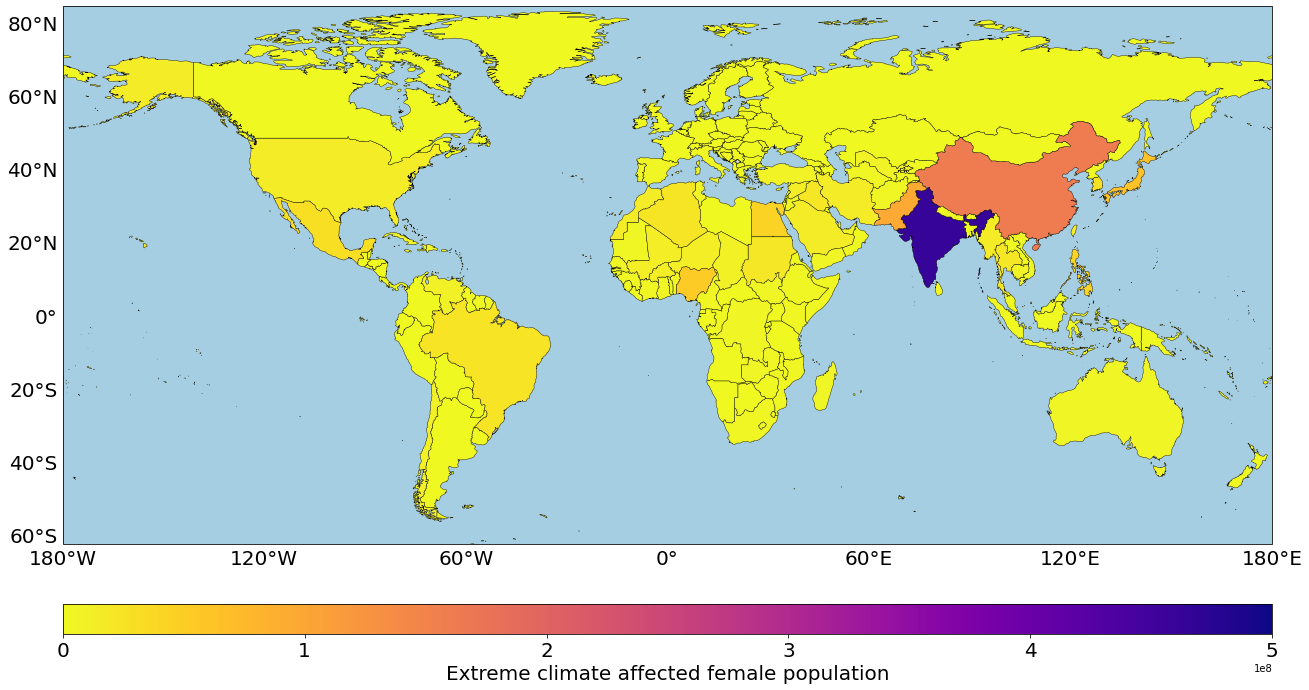

min: 0.0, max: 100.0


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (% Extreme climate affected female population)
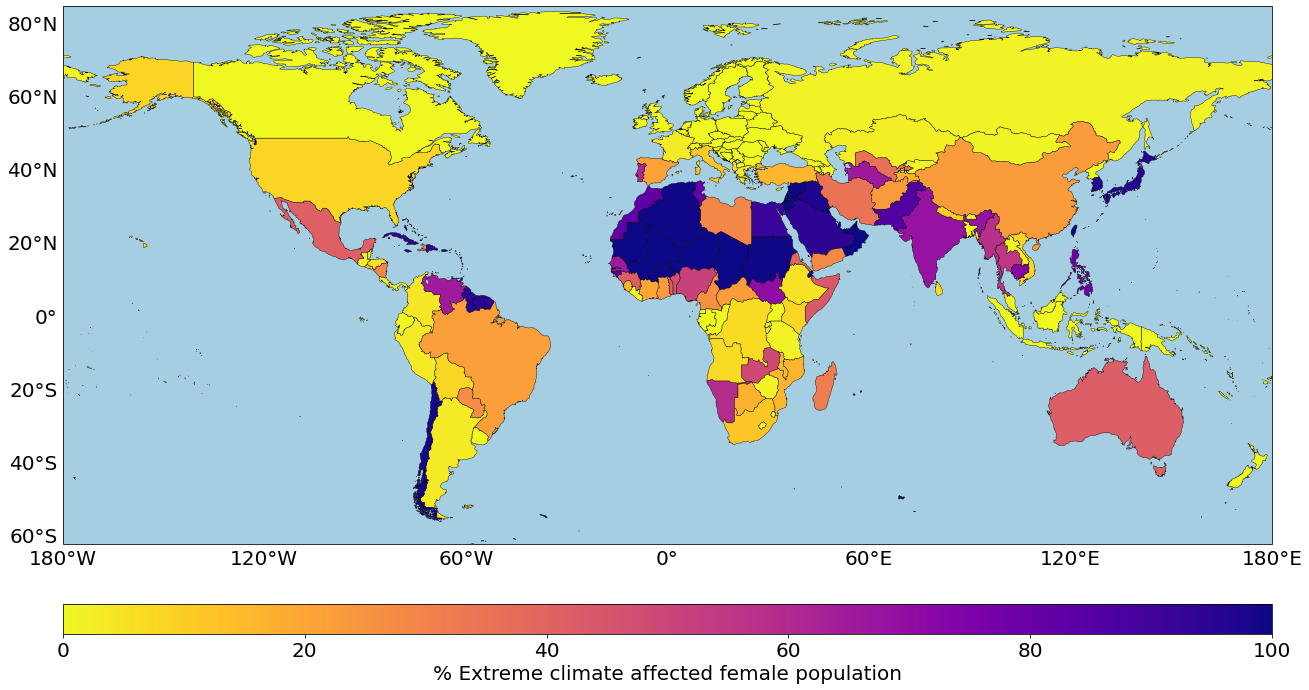

min: -7.888725941592583, max: 5.220216870628192


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Extreme climate affected % difference between female and male population)
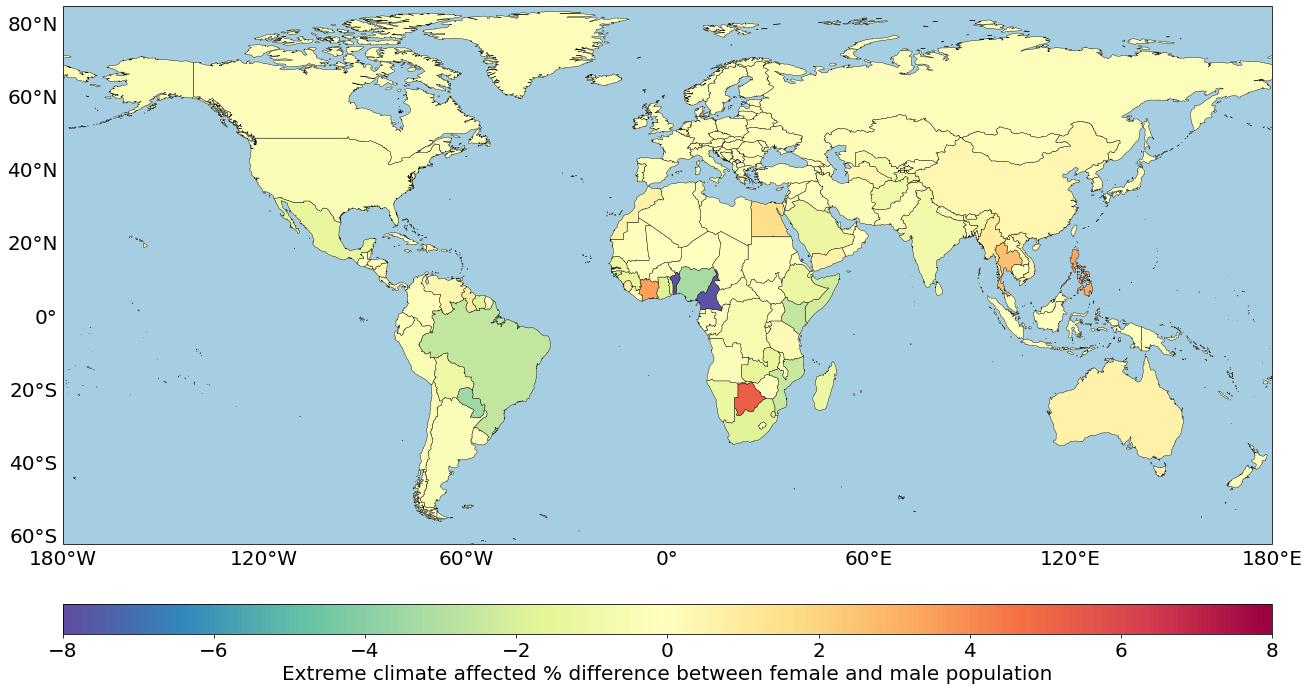

Most vulnerable countries: Botswana, Gambia, Côte d'Ivoire, Philippines, Thailand
Most vulnerable SIDS: Saint Vincent and the Grenadines, Dominican Republic, Guyana, Jamaica, Trinidad and Tobago
Most vulnerable LDC: Gambia, Sierra Leone, Myanmar, Yemen, Tanzania, United Republic of
Most vulnerable LLDC: Botswana, Turkmenistan, Kazakhstan, Lao People's Democratic Republic, Burkina Faso


,Name,Extreme climate affected % difference between female and male population,% Extreme climate affected female population,Extreme climate affected female population
0,Botswana,5.22,17.1,"202,200"
1,Gambia,4.68,38.2,"471,827"
2,Côte d'Ivoire,3.49,19.8,"2,647,038"
3,Philippines,3.28,78.5,"42,250,072"
4,Thailand,2.58,55.2,"21,123,581"
5,"Bonaire, Sint Eustatius and Saba",1.81,27.7,"4,241"
6,SIDS,-0.11,50.9,"20,316,949"
7,LDC,-0.41,34.8,"143,199,965"
8,LLDC,-0.17,24.2,"76,974,250"
9,Asia,0.05,46.6,"1,028,439,767"


In [14]:
i = 3
a = df[ [var_g[0][i], var_g[1][i]] ].sum()
b = ( 100 * df[ [name_g[0][i], name_g[1][i]] ].sum()
    / df[ [var_g[0][i], var_g[1][i]] ].sum().values )
# Parámetros de visualización de tablas
pd.options.display.float_format = '{:,.0f}'.format
print(a.to_string())
# Parámetros de visualización de tablas
pd.options.display.float_format = '{:,.1f} %'.format
print(b.to_string())
print()

# Mapas
# Mujeres afectadas
n_series = "female"
vn = name_g[0][i]
borders[vn] = df[vn]
print(f"min: {borders[vn].min()}, max: {borders[vn].max()}")
min = 0
max = 5e8
map_v = gv.Polygons( borders, vdims = gv.Dimension(vn, range = (min, max) )
    ).opts( cmap = "plasma_r", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )
# Porcentaje de mujeres afectadas
n_series = "female"
vn = perc_g[0][i]
borders[vn] = df[vn].where( df[vn] < 100, 100)
print(f"min: {borders[vn].min()}, max: {borders[vn].max()}")
min = 0
max = 100
map_v = gv.Polygons( borders, vdims = gv.Dimension(vn, range = (min, max) )
    ).opts( cmap = "plasma_r", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )
# Diferencia de porcentaje entre mujeres y hombre
n_series = "female"
vn = diff[i]
borders[vn] = df[vn]
print(f"min: {borders[vn].min()}, max: {borders[vn].max()}")
#print(borders[vn].sort_values().dropna().to_string())
min = -8
max = 8
map_v = gv.Polygons( borders, vdims = gv.Dimension(vn, range = (min, max) )
    ).opts( cmap = "spectral_r", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

disp = display(df, diff[i], var_i = [ perc_g[0][i], name_g[0][i] ],
    p = False, type = "index", add = [False, False, True],
    format = ["{:,.2f}", "{:,.1f}", "{:,.0f}"])
disp

In [19]:
a = ( 100 * df[var_g[0][i]] / ( df[var_g[1][i]] + df[var_g[0][i]] ) )
print(a.describe().drop("count").to_string())
a.sort_values().dropna()

mean   50.1 %
std     3.2 %
min    25.4 %
25%    49.7 %
50%    50.5 %
75%    51.5 %
max    54.5 %


ISO_A3
QAT   25.4 %
ARE   28.6 %
OMN   35.1 %
BHR   35.7 %
VAT   37.0 %
       ...  
BLR   54.2 %
LTU   54.3 %
LVA   54.4 %
RUS   54.5 %
NFK   54.5 %
Length: 240, dtype: float64

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format
df[diff].describe().drop("count")

,"Extreme climate affected % difference between female and male population, 0-12 months old","Extreme climate affected % difference between female and male population, 0-5 years old","Extreme climate affected % difference between female and male population, more than 65 years old",Extreme climate affected % difference between female and male population
mean,-0.04,-0.04,-0.15,-0.15
std,0.37,0.35,1.14,1.14
min,-3.88,-3.88,-7.89,-7.89
25%,-0.00,-0.00,-0.01,-0.01
50%,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00
max,1.49,1.49,5.22,5.22


In [ ]:
disp = display(df, perc_g[0][2], var_i = [ name_g[0][2] ], p = False,
    type = "index", add = [False, True], format = ["{:,.1f}", "{:,.0f}"])
disp

Most vulnerable countries: Bahrain, Guadeloupe, Palestine, State of, Martinique, Hong Kong
Most vulnerable SIDS: Guadeloupe, Martinique, Dominica, Virgin Islands (British), Turks and Caicos Islands
Most vulnerable LDC: Niger, Chad, Mali, Mauritania, Burkina Faso
Most vulnerable LLDC: Niger, Chad, Mali, Burkina Faso, South Sudan


,Name,"% Extreme climate affected female population, more than 65 years old","Extreme climate affected female population, more than 65 years old"
0,Bahrain,100.0,"27,607"
1,Guadeloupe,100.0,"45,303"
2,"Palestine, State of",100.0,"108,295"
3,Martinique,100.0,"47,971"
4,Hong Kong,100.0,"685,601"
5,Mauritius,100.0,"91,830"
6,SIDS,50.9,"2,388,604"
7,LDC,35.2,"4,966,045"
8,LLDC,24.0,"2,308,251"
9,Asia,46.5,"96,805,650"


In [ ]:
disp = display(df, name_g[0][i], var_i = [ perc_g[0][i] ], p = False,
    type = "index", add = [True, False ], format = ["{:,.0f}", "{:,.1f}"])
disp

Most vulnerable countries: India, China, Pakistan, Japan, Nigeria
Most vulnerable SIDS: Dominican Republic, Cuba, Haiti, Puerto Rico, Jamaica
Most vulnerable LDC: Sudan, Myanmar, Niger, Burkina Faso, Mali
Most vulnerable LLDC: Niger, Burkina Faso, Mali, Chad, Uzbekistan


,Name,Extreme climate affected female population,% Extreme climate affected female population
0,India,"461,800,004",68.2
1,China,"161,805,350",23.0
2,Pakistan,"95,512,707",85.5
3,Japan,"63,998,010",96.2
4,Nigeria,"54,590,284",51.4
5,Egypt,"43,033,963",92.0
6,SIDS,"20,316,949",50.9
7,LDC,"143,199,965",34.8
8,LLDC,"76,974,250",24.2
9,Asia,"1,028,439,767",46.6
